<a href="https://colab.research.google.com/github/L40S38/DetectiveConan_graphviz/blob/main/graph_viz_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 名探偵コナンのデータセットでGraphVizの練習をしよう

In [ ]:
#anacondaでインストール可能
#%conda install -c conda-forge graphviz -y
#%conda install -c conda-forge python-graphviz -y

anacondaでインストールした場合は、以下のような資料を参考に環境変数の設定を行う。
- [Anaconda環境でGraphvizを使う](https://qiita.com/nemutas/items/4f7bd96f63cf78bdb357) by @nemutas
- [Graphvizは多分condaだけでインストールできるよって話](https://qiita.com/Colonel_GTU/items/4ad7449030c9e2c23427) by Colonel_GTU

（参考）私のWindowsの場合は`C:...\anaconda3\pkgs\graphviz-{version}-{hogehoge}\Library\bin`のパスにdot.exeがありました。

コマンドラインで`dot -V`を打ってバージョン情報(`dot - graphviz version 2.50.0 (0)`など)が出てくればOK

In [1]:
#colabのときはpipでインストールすればよい。
%pip install graphviz

In [6]:
!git clone https://github.com/L40S38/DetectiveConan_graphviz
%cd DetectiveConan_graphviz

Cloning into 'DetectiveConan_graphviz'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 0), reused 18 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 74.42 KiB | 18.60 MiB/s, done.
/content/DetectiveConan_graphviz


## graphvizのサンプルコード

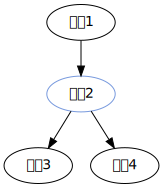

In [7]:
from graphviz import Digraph

dot = Digraph(format='png')
# フォント設定
dot.attr('node', fontname="MS Gothic")
# ノード作成
dot.node("項目1")
dot.node('項目2', color="#7799dd")
dot.node("項目3")
dot.node("項目4")
# エッジ作成
dot.edge("項目1", "項目2")
dot.edge("項目2", "項目3")
dot.edge("項目2", "項目4")
dot

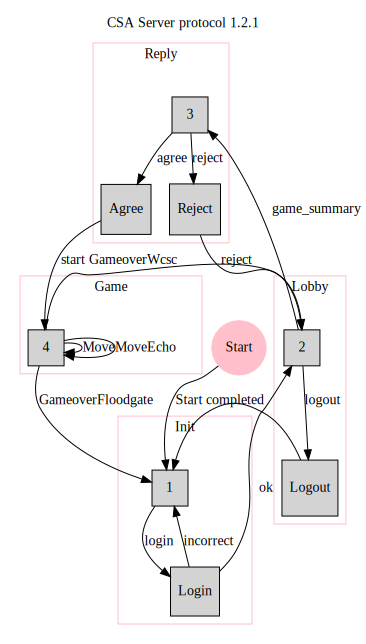

In [8]:
from graphviz import Digraph

# グラフの設定
g = Digraph(format="png")
g.attr("node", shape="square", style="filled")

# クラスター 'cluster_' から名前を始める必要あり
with g.subgraph(name='cluster_root') as c:
    # 一番外側のクラスターのラベルは図のタイトルのように見える
    c.attr(color='white', label='CSA Server protocol 1.2.1')

    # 開始ノード
    c.node("Start", shape="circle", color="pink")

    # ２つのノードと、その二間の有向な辺
    c.edge("Start", "1", label="Start")

    with c.subgraph(name='cluster_init') as c2:
        c2.attr(color='pink', label='Init')
        c2.node('1')
        c2.node('Login')
        c2.edge('1', 'Login', label='login')
        c2.edge('Login', '1', label='incorrect')

    with c.subgraph(name='cluster_lobby') as c2:
        c2.attr(color='pink', label='Lobby')
        c2.node('2')
        c2.node('Logout')
        c2.edge("2", "Logout", label="logout")

    with c.subgraph(name='cluster_reply') as c2:
        c2.attr(color='pink', label='Reply')
        c2.node('3')
        c2.node('Agree')
        c2.node('Reject')
        c2.edge("3", "Agree", label="agree")
        c2.edge("3", "Reject", label="reject")

    with c.subgraph(name='cluster_game') as c2:
        c2.attr(color='pink', label='Game')
        c2.node('4')
        c2.edge("4", "4", label="Move")
        c2.edge("4", "4", label="MoveEcho")

    c.edge("Login", "2", label="ok")
    c.edge("Logout", "1", label="completed")
    c.edge("Reject", "2", label="reject")
    c.edge("2", "3", label="game_summary")
    c.edge("Agree", "4", label="start")
    c.edge("4", "2", label="GameoverWcsc")
    c.edge("4", "1", label="GameoverFloodgate")
g

In [9]:
import glob

character_csv = glob.glob('./CaseClosed/characters/*.csv')
character_dict = dict()
for file in character_csv:
    df = pd.read_csv(file,encoding='utf-8')
    character_dict[df.columns[0]]=list(df[df.columns[0]])
character_dict

{'メインキャラ': ['江戸川コナン',
  '工藤新一',
  '毛利蘭',
  '鈴木園子',
  '阿笠博士',
  '吉田歩美',
  '小嶋元太',
  '円谷光彦',
  '安室透',
  '毛利小五郎',
  '灰原哀',
  '世良真純',
  'メアリー世良',
  '小林澄子',
  '羽田秀𠮷'],
 '黒の組織': ['ベルモット',
  'クリス・ヴィンヤード',
  'バーボン',
  'スコッチ',
  'ジン',
  'キール',
  '本堂瑛海',
  '水無玲奈',
  'ライ',
  '諸星大',
  'シェリー',
  'ラム',
  '脇田兼則'],
 '宮野家': ['宮野エレーナ', '宮野志保', '宮野明美', '宮野厚司'],
 'FBI': ['赤井秀一', '沖矢昴', 'ジョディ・スターリング', 'ジェイムズ・ブラック', 'アンドレ・キャメル'],
 '警察': ['佐藤美和子',
  '高木渉',
  '千葉和伸',
  '三池苗子',
  '白鳥任三郎',
  '宮本由美',
  '松田陣平',
  '萩原研二',
  '諸伏高明',
  '大和勘助',
  '上原由衣',
  '萩原千速',
  '横溝重悟',
  '横溝参悟',
  '山村ミサオ',
  '伊達航',
  '目暮十三',
  '降谷零',
  '諸伏景光'],
 '大阪・京都': ['服部平次', '遠山和葉', '大岡紅葉', '伊織無我', '服部平蔵', '服部静華', '遠山銀司郎']}

In [10]:
import pandas as pd

relations = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
relations

,character1,character2,label,vec
0,ベルモット,クリス・ヴィンヤード,同一人物,0.0
1,バーボン,降谷零,同一人物,0.0
2,バーボン,安室透,同一人物,0.0
3,安室透,毛利小五郎,弟子入り,1.0
4,スコッチ,諸伏景光,同一人物,0.0
5,ジン,赤井秀一,敵対視,0.0
6,ベルモット,ジョディ・スターリング,敵対視,0.0
7,キール,本堂瑛海,同一人物,0.0
8,キール,水無玲奈,同一人物,0.0
9,ライ,赤井秀一,同一人物,0.0


labelはcharacter1とcharacter2の関係性を、vecは1方向か双方向かを示している。

In [11]:
character_dict.keys()

dict_keys(['メインキャラ', '黒の組織', '宮野家', 'FBI', '警察', '大阪・京都'])

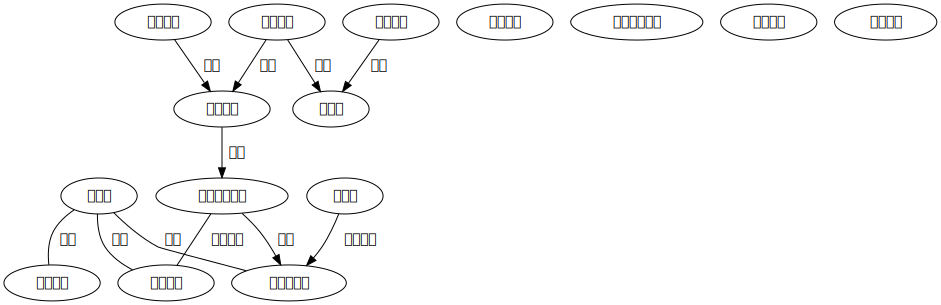

In [12]:
## 一部のキャラクターのみ表示する
import glob

characters_dot = Digraph(format='png')
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
k = 'メインキャラ' #must be in ['黒の組織', 'FBI', 'メインキャラ', '宮野家', '警察', '大阪・京都']
for c in character_dict[k]:
    characters_dot.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if not c1 in character_dict[k] or not c2 in character_dict[k]:
        continue
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

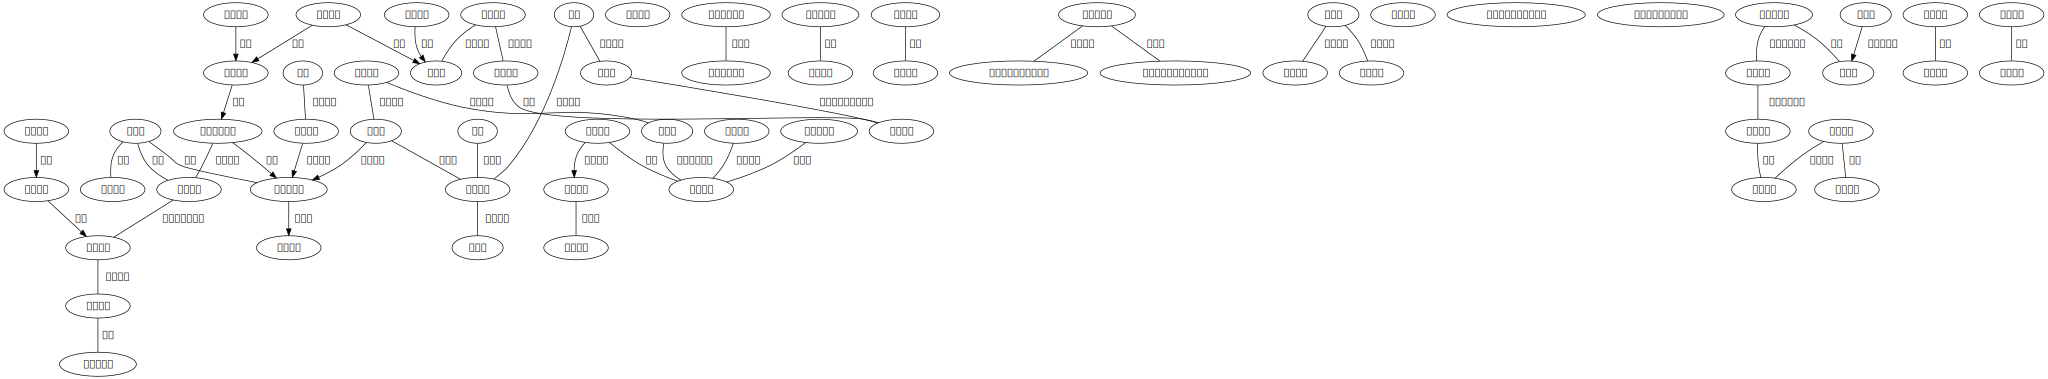

In [13]:
import glob

#グループ構造にしない
characters_dot = Digraph(format='png')
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
for k in character_dict.keys():
    for c in character_dict[k]:
        characters_dot.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

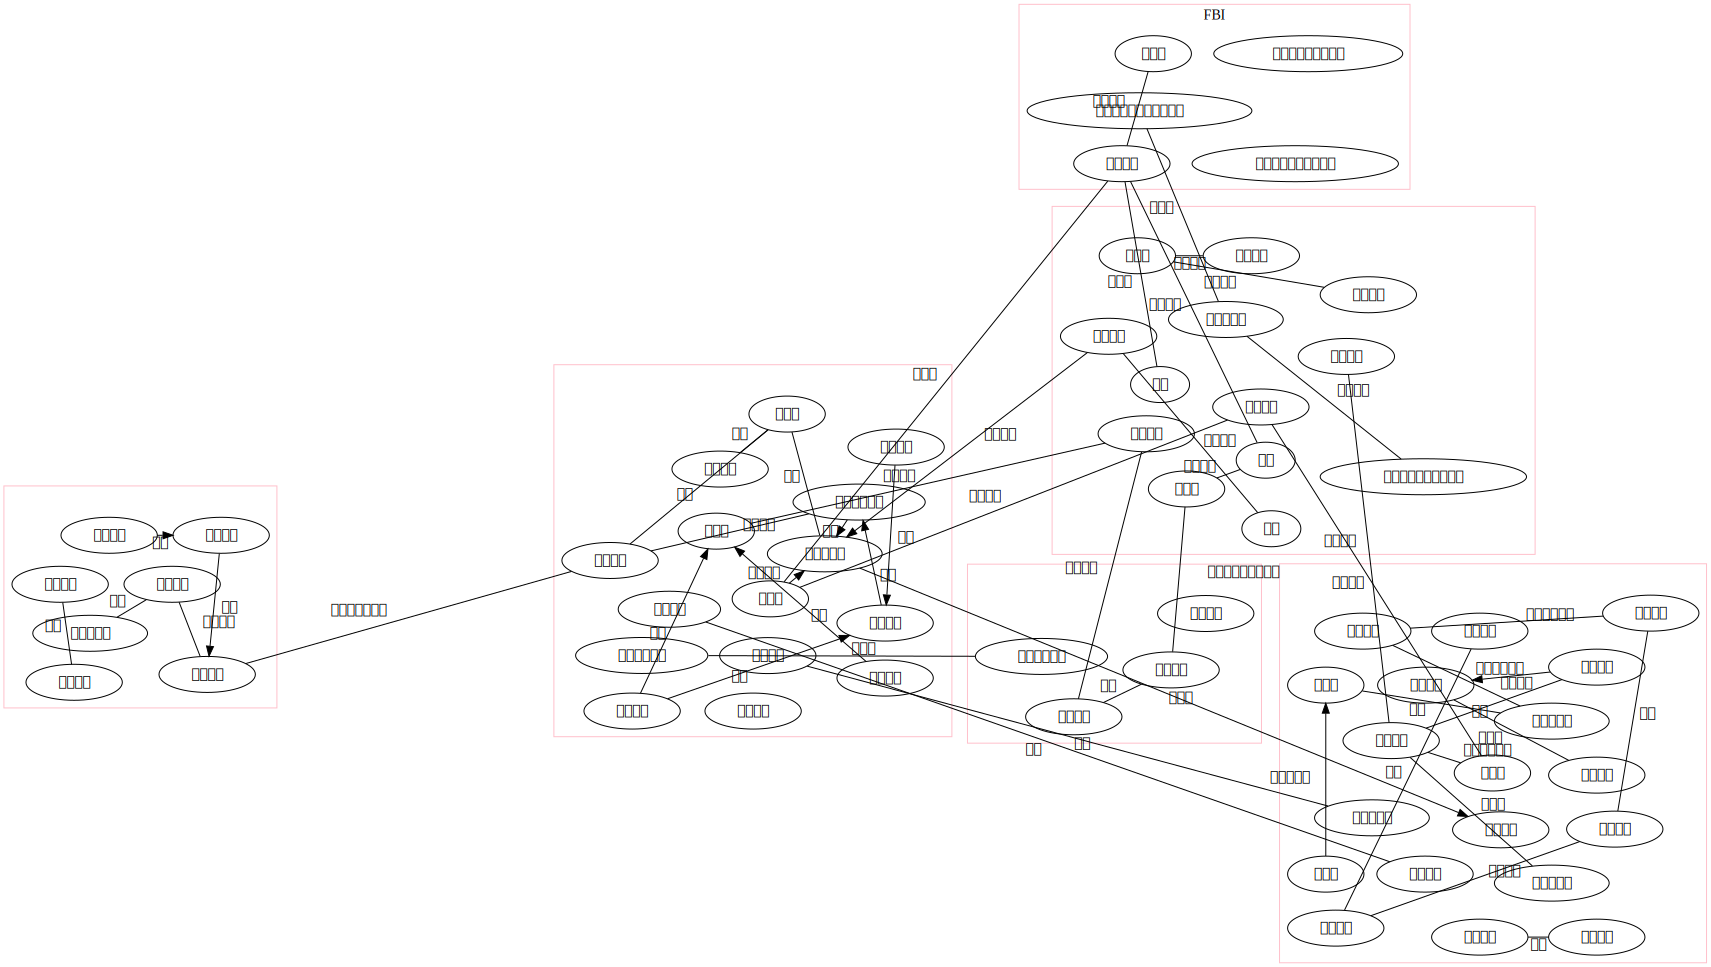

In [16]:
characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "fdp"

characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
for k in character_dict.keys():
    with characters_dot.subgraph(name='cluster'+k) as sg:
        sg.attr(color='pink',label=k)
        for c in character_dict[k]:
            sg.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

In [17]:
characters_dot.render('DetectiveConan_characters_graph') #画像の保存

'DetectiveConan_characters_graph.png'

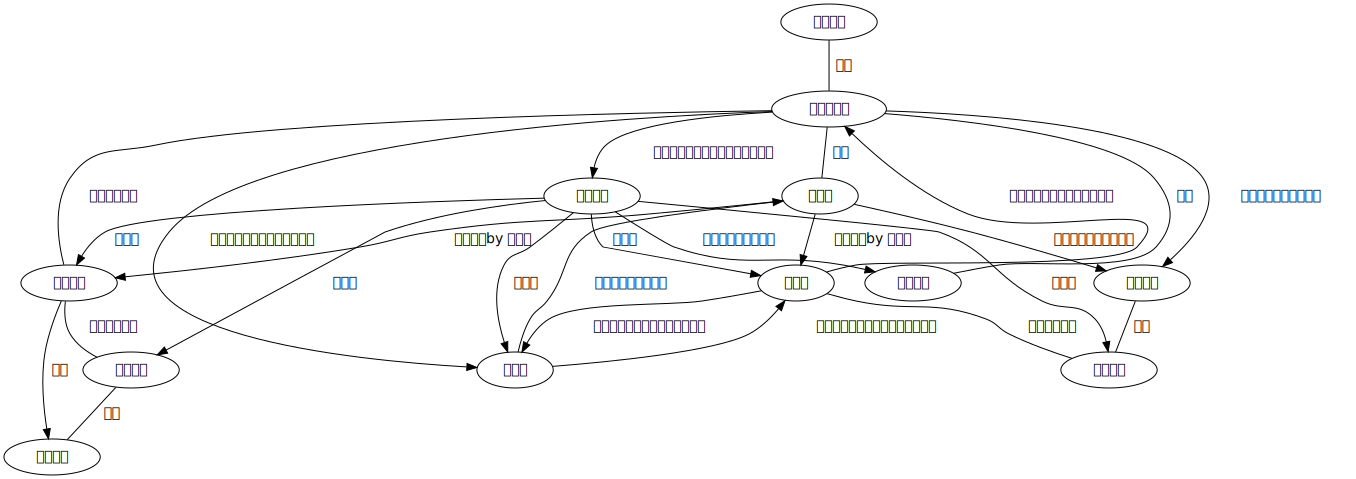

In [15]:
#Wild Police Story関連
from graphviz import Digraph
import pandas as pd

characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "dot"

characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./WildPoliceStory/PoliceMembers.csv',encoding='utf-8')
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot